In [1]:
import pandas as pd

In [14]:
# df = pd.read_csv('athletes.csv')
df = pd.read_csv('../height_weight.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
sex       200 non-null object
weight    200 non-null int64
height    200 non-null int64
repwt     183 non-null float64
repht     183 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 7.9+ KB


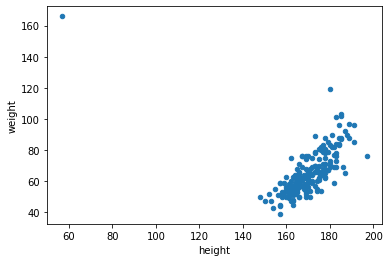

In [4]:
%matplotlib inline
df.plot.scatter(x='height',y='weight')

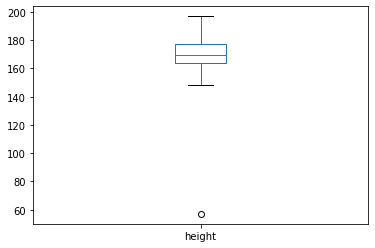

In [5]:
# A box plot shows (min, 25th percentile, median, 75th percentile, max) read from bottom to top. Any points beyond
# are outliers. As see in the below, all the circles
heights = df['height']
heights.plot.box()

In [6]:
# Inter quartile range = iqr
q1 = heights.quantile(.25)
q3 = heights.quantile(.75)
iqr = q3 - q1
pmin = q1 - 1.5*iqr
pmax = q3 + 1.5*iqr
new_heights = heights.where(heights.between(pmin, pmax)) # this replaces with null values for rows with outliers

In [7]:
# To compare the values side by side, define a new dataframe
compare = pd.DataFrame({'before': heights, 'after': new_heights})

In [8]:
# With text
compare.describe()

,before,after
count,200.000000,199.000000
mean,170.020000,170.587940
std,12.007937,8.948848
min,57.000000,148.000000
25%,164.000000,164.000000
50%,169.500000,170.000000
75%,177.250000,177.500000
max,197.000000,197.000000


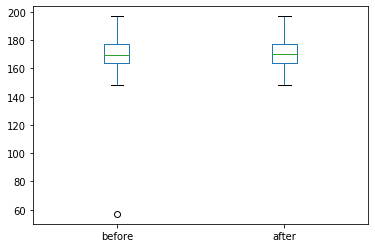

In [9]:
# Compare graphically
compare.plot.box()

In [10]:
# As we are good with above diagram i.e outliers are remove, lets perist the original
heights.where(heights.between(pmin, pmax),inplace=True)

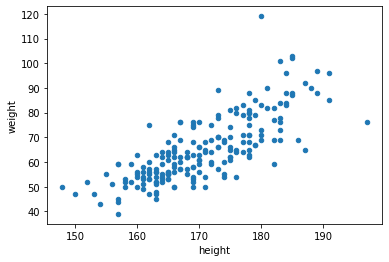

In [11]:
# Looks better than before
df.plot.scatter(x='height',y='weight')

In [15]:
# Check if there are duplicates
df.duplicated().any()

False

In [16]:
# find duplicated rows
df[df.duplicated()]

,sex,weight,height,repwt,repht


In [17]:
df.drop_duplicates(inplace=True)

In [18]:
# Check if there are duplicates
df.duplicated().any()

False

In [19]:
# Returns unique values for a Series
df['height'].unique()

array([182, 161, 177, 157, 170, 167, 186, 178, 171, 175,  57, 168, 163,
       166, 187, 197, 180, 173, 169, 183, 164, 176, 174, 179, 160, 162,
       165, 185, 172, 189, 158, 184, 159, 155, 152, 153, 148, 188, 191,
       150, 154, 181, 156])

In [20]:
# Get all rows that have unique height values only i.e. if height is duplicated, then that row is not shown
df[df['height'].isin(df['height'].unique())]

,sex,weight,height,repwt,repht
0,M,77,182,77.0,180.0
1,F,58,161,51.0,159.0
2,F,53,161,54.0,158.0
3,M,68,177,70.0,175.0
4,F,59,157,59.0,155.0
...,...,...,...,...,...
195,M,74,175,71.0,175.0
196,M,83,180,80.0,180.0
197,M,81,175,NaN,NaN
198,M,90,181,91.0,178.0


In [21]:
# Get all rows that have duplicated height values. df.duplicated() only shows the full row that is duplicated
df[~df['height'].isin(df['height'].unique())]

,sex,weight,height,repwt,repht


In [33]:
# Observe that gold silver bronze have been read as object, but they are supposed to be numbers/int.
df = pd.read_csv('../height_weight_bad_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
sex       200 non-null object
weight    200 non-null int64
height    200 non-null int64
repwt     183 non-null object
repht     183 non-null float64
dtypes: float64(1), int64(2), object(2)
memory usage: 7.9+ KB


In [34]:
df[['height','weight','repwt']].head(10)

,height,weight,repwt
0,182,77,77
1,161,58,51
2,161,53,54
3,177,68,7O
4,157,59,59
5,170,76,76
6,167,76,77
7,186,69,73
8,178,71,71
9,171,65,64


In [35]:
# If you see at the bottom (invalid literal for int() with base 10: 'O'), someone typed letter O instead of zero, hence wrong data entered
df['repwt'].astype(float)

ValueError: could not convert string to float: '7O'

In [27]:
# get the row that has repwt = 'O'
df[df['repwt'].str.contains('O')]

ValueError: cannot index with vector containing NA / NaN values

In [28]:
# get the row that has repwt = 'O'
df[df['repwt'].str.contains('O',na=False)]

,sex,weight,height,repwt,repht
3,M,68,177,7O,175.0


In [36]:
df.loc[3,['repwt']] = 70

In [37]:
df['repwt'] = df['repwt'].astype(float)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
sex       200 non-null object
weight    200 non-null int64
height    200 non-null int64
repwt     183 non-null float64
repht     183 non-null float64
dtypes: float64(2), int64(2), object(1)
memory usage: 7.9+ KB


In [39]:
df[['weight','height','repwt']].sum()

weight    13160.0
height    34004.0
repwt     12009.0
dtype: float64

In [41]:
# there is already id column in data, that we can use for index
df = pd.read_csv('../height_weight_with_index.csv')
df

,id,sex,weight,height,repwt,repht
0,1,M,77,182,77.0,180.0
1,2,F,58,161,51.0,159.0
2,3,F,53,161,54.0,158.0
3,4,M,68,177,70.0,175.0
4,5,F,59,157,59.0,155.0
...,...,...,...,...,...,...
195,196,M,74,175,71.0,175.0
196,197,M,83,180,80.0,180.0
197,198,M,81,175,NaN,NaN
198,199,M,90,181,91.0,178.0


In [42]:
# We can set index like this, but as you can see now we have id twice. Sure you can drop id, but there is a better way
df.index = df['id']
df

,id,sex,weight,height,repwt,repht
id,,,,,,
1,1,M,77,182,77.0,180.0
2,2,F,58,161,51.0,159.0
3,3,F,53,161,54.0,158.0
4,4,M,68,177,70.0,175.0
5,5,F,59,157,59.0,155.0
...,...,...,...,...,...,...
196,196,M,74,175,71.0,175.0
197,197,M,83,180,80.0,180.0
198,198,M,81,175,NaN,NaN


In [43]:
# we set index to id, drop the id column and apply it on original dataframe
df.set_index('id',drop=True,inplace=True)

In [44]:
df

,sex,weight,height,repwt,repht
id,,,,,
1,M,77,182,77.0,180.0
2,F,58,161,51.0,159.0
3,F,53,161,54.0,158.0
4,M,68,177,70.0,175.0
5,F,59,157,59.0,155.0
...,...,...,...,...,...
196,M,74,175,71.0,175.0
197,M,83,180,80.0,180.0
198,M,81,175,NaN,NaN


In [45]:
# rename column names
df.rename(columns={"height":"measured_height","weight":"measured_weight"},inplace=True)
df.head()

,sex,measured_weight,measured_height,repwt,repht
id,,,,,
1,M,77,182,77.0,180.0
2,F,58,161,51.0,159.0
3,F,53,161,54.0,158.0
4,M,68,177,70.0,175.0
5,F,59,157,59.0,155.0


In [48]:
# Lets drop all na rows. As you can see after dropping, only 831 rows left but index runs from 0 to 199
df = pd.read_csv('../height_weight_with_index.csv')
df.dropna(inplace=True)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 0 to 199
Data columns (total 6 columns):
id        181 non-null int64
sex       181 non-null object
weight    181 non-null int64
height    181 non-null int64
repwt     181 non-null float64
repht     181 non-null float64
dtypes: float64(2), int64(3), object(1)
memory usage: 9.9+ KB


,id,sex,weight,height,repwt,repht
0,1,M,77,182,77.0,180.0
1,2,F,58,161,51.0,159.0
2,3,F,53,161,54.0,158.0
3,4,M,68,177,70.0,175.0
4,5,F,59,157,59.0,155.0
...,...,...,...,...,...,...
194,195,F,62,164,61.0,161.0
195,196,M,74,175,71.0,175.0
196,197,M,83,180,80.0,180.0
198,199,M,90,181,91.0,178.0


In [49]:
# reset index will reset to a simple integer sequence. If you don't have drop=True, then the old index is stored in a new column
df.reset_index()

,index,id,sex,weight,height,repwt,repht
0,0,1,M,77,182,77.0,180.0
1,1,2,F,58,161,51.0,159.0
2,2,3,F,53,161,54.0,158.0
3,3,4,M,68,177,70.0,175.0
4,4,5,F,59,157,59.0,155.0
...,...,...,...,...,...,...,...
176,194,195,F,62,164,61.0,161.0
177,195,196,M,74,175,71.0,175.0
178,196,197,M,83,180,80.0,180.0
179,198,199,M,90,181,91.0,178.0


In [50]:
# reset index will reset to a simple integer sequence. If you don't have drop=True, then the old index is stored in a new column
df.reset_index(drop=True, inplace=True)

In [51]:
df

,id,sex,weight,height,repwt,repht
0,1,M,77,182,77.0,180.0
1,2,F,58,161,51.0,159.0
2,3,F,53,161,54.0,158.0
3,4,M,68,177,70.0,175.0
4,5,F,59,157,59.0,155.0
...,...,...,...,...,...,...
176,195,F,62,164,61.0,161.0
177,196,M,74,175,71.0,175.0
178,197,M,83,180,80.0,180.0
179,199,M,90,181,91.0,178.0
